In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

# Exoplanet properties - period

This notebook covers how to determine the orbital period of a transiting planet from a TESS lightcurve. The ortbial period is the separation in time between consectutive transit events, and represents the duration of a year for that planet. The code in this notebook builds on what was covered in ealier notebooks (and episodes) and relies on the use of the lightkurve tool. 

Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you run a cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a #, or within triple quotation marks (''') is ignored by the code (except in this cell because I made this into a text cell)


In [3]:
TIC = 'TIC 284475976'# !! CHANGE THIS to run code for a different TIC ID


In [4]:
# search the available data and select the data that you want

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'

'''

available_data_select = lk.search_lightcurve(TIC, author = 'SPOC') # !! CHANEG THIS (see above)

# download the selected data and 'stitch' the data from the different sectors together
lc_collection = available_data_select.download_all().stitch()



<IPython.core.display.Javascript object>


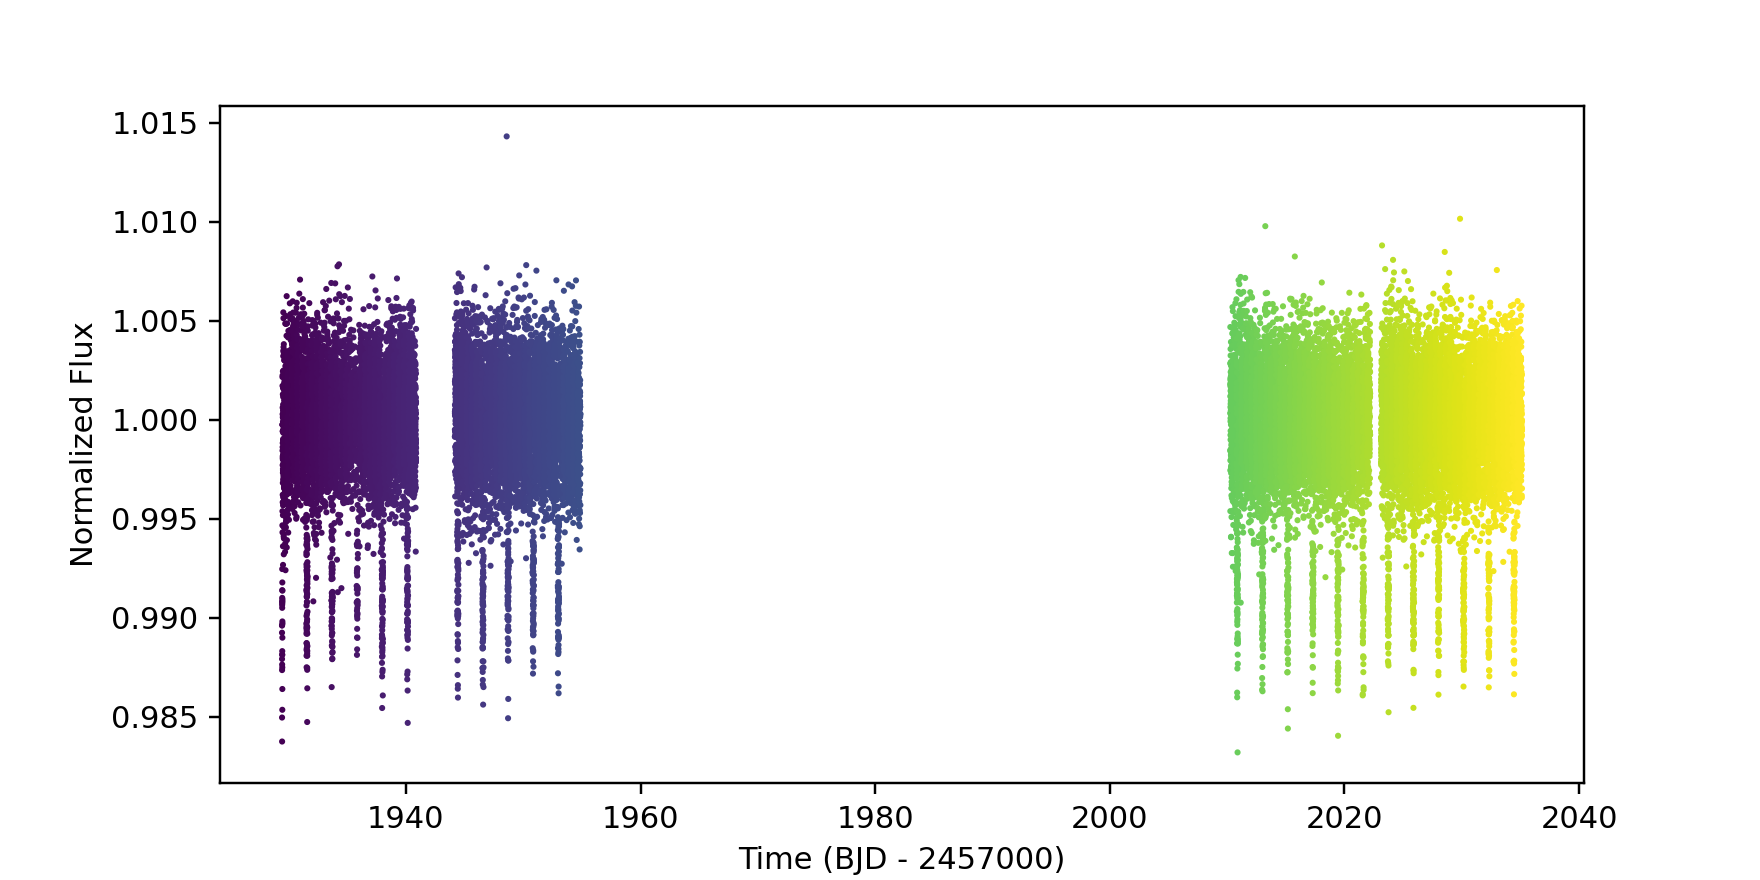

In [7]:
# plot the data to look at when the transit events are
# this plotting is different to how we did it previously as I wanted to plot the data points coloured by time (earlier times are darker)
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = lc_collection.time.value, s = 1)

plt.xlabel("Time (BJD - 2457000)")
plt.ylabel("Normalized Flux")
plt.show()

In [9]:
# determine the times of two consecutive transit events (they don't need to be the first ones, but they do need to be consecutive)
# look them up on the figure above by zoomig in on transits

transit_time_1 = 1931.56 # !! CHANGE THIS
transit_time_2 = 1933.71 # !! CHANGE THIS

# the period is the separation between two consecutive transits 
starting_period = transit_time_2 - transit_time_1

print ("Period : {} days".format(starting_period))


Period : 2.150000000000091 days


<IPython.core.display.Javascript object>


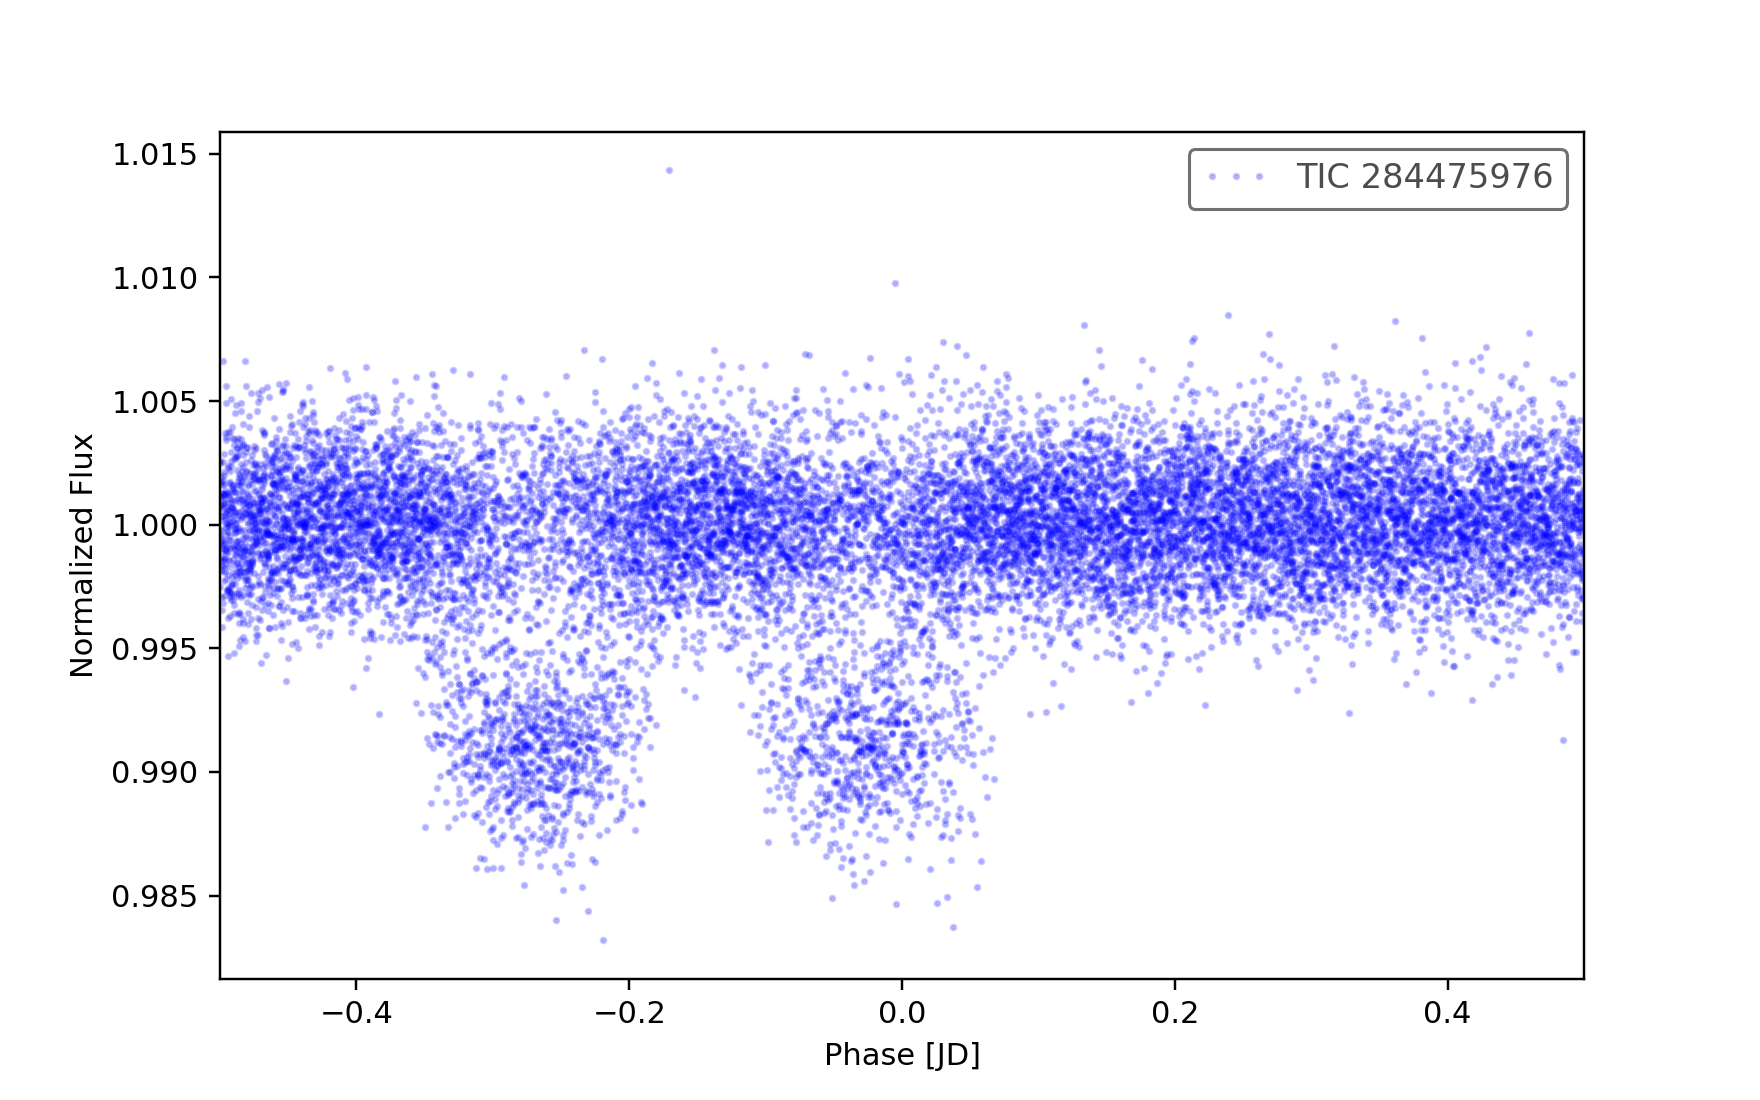

(-0.5, 0.5)

In [14]:
# look at the period printed out above and copy and paste it here
# this is the period that we will start off with (and refine if need be)

period = 2.15 # !! CHANGE THIS to refine the period - the real period for this target is closer to: 2.1435 days

# phase fold the light curve using this period and the time of one of the above transit as the value of t0 (see previous notebook)
lc_phased = lc_collection.fold(period = period, epoch_time = transit_time_1)

# plot the binned and unbinned phase folded lightcurve on the same figure
fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'blue', alpha = 0.2, markersize = 3)

plt.xlim(-0.5,0.5)

# change the period above and re run this cell until the transit events below line up

In [22]:
# interactive finding the orbital period
# NOTE once you've run the below line of code, you will no longer be able to zoom in on the lightcurve! 
# You'll have to restart the notebook to be able to zoom in on the plots (even the ones earlier in this notebook) again! 

%matplotlib inline 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


In [31]:
def plot_phase_folded_color(period):

    # phase fold the light curve
    lc_phased = lc_collection.fold(period = period, epoch_time = transit_time_1)
    
    # plot the binned and unbinned phase folded lightcurve on the same figure
    fig, ax = plt.subplots(figsize = (8,5))
    
    plt.scatter(lc_phased.time.value, lc_phased.flux.value, c = lc_phased.time_original.value, s = 1, marker = '.')
    
    # if you prefer all the point to have the same color, delete the line above and get rid of the hastag in fron of the line below
    #lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 0.2, markersize = 3)
    
    plt.xlabel("Phase")
    plt.ylabel("Normalized flux")
    plt.show()

In the code below you can change the period using a slider and watch how different orbital periods affect the phase folded lightcurve. if you click on the slider, you can use the arrows on the keypad to move it by smaller amounts. NOTE: there is often a bit of a lag between changing the value and the figure updating!

Run the interactive widget using this line of code (see example below):

*interact(plot_phase_folded_color, period = widgets.FloatSlider(**value**=xx,**min**=xx,**max**=xx,**step**=xx,description='period:', readout_format='.4f'))*

The values in bold need to be changed for different targets!
- **value**: starting guess at the period
- **min**: the minimum period that you think it could be
- **max**: the maximum period that you think it could be
- **step**: the step size that the widget jumps when you press the up or down arrow on your keyboard (good starting point=0.0001 - if you see no change in the phase folded lighcurve when you press the up and down errors then make the step sizelarger!)

In order to use this widget, you need to give it a range of periods that you want to test (so you already need an idea of the period!). 



In [32]:
# interactive widget - read above for what to change in this line of code :)
interact(plot_phase_folded_color, period = widgets.FloatSlider(value=2.145,min =2.14,max=2.15,step=0.0001,description='period:', readout_format='.4f'))


interactive(children=(FloatSlider(value=2.145, description='period:', max=2.15, min=2.14, readout_format='.4f'…

<function __main__.plot_phase_folded_color(period)>